In [ ]:

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

In [ ]:
api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle as kg
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
kg.api.dataset_download_files(dataset = "new-york-city/ny-2015-street-tree-census-tree-data", path='data', unzip=True)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("./data/2015-street-tree-census-tree-data.csv")

In [ ]:
#1. Show data previews using tables.
df.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common  ...  \
0  Alive   Fair                         Acer rubrum        red maple  ...   
1  Alive   Fair                   Quercus palustris          pin oak  ...   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
4  Alive   Good                     Tilia americana  American linden  ...   

   boro_ct     state   latitude  longitude         x_sp         y_sp  \
0  4073900  New York  40.723092 -73.844215  1027431.148  202756.7687   
1  4097300  New York  40.794111 -73.818679  1034455.701  228644.8374   
2  3044900  New York  40.717581 -73.936608  1001822.831  200716.8913   
3  3044900  New York  40.713537 -73.934456  1002420.358  199244.2531   
4  3016500  New York  40.666778 -73.975979   990913.775  182202.4260   

  council district census tract        bin           bbl  
0             29.0        739.0  4052307.0  4.022210e+09  
1             19.0        973.0  4101931.0  4.044750e+09  
2             34.0        449.0  3338310.0  3.028870e+09  
3             34.0        449.0  3338342.0  3.029250e+09  
4             39.0        165.0  3025654.0  3.010850e+09  

[5 rows x 45 columns]

health               4.623655
spc_latin            4.624094
spc_common           4.624094
steward             75.964773
guards              88.320064
sidewalk             4.623655
problems            66.971634
council district     0.953366
census tract         0.953366
bin                  1.397948
bbl                  1.397948
dtype: float64


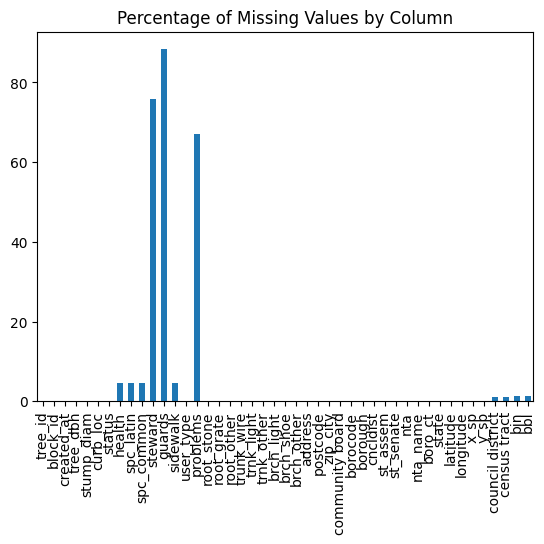

In [ ]:
#2. Use tables or graphs to demonstrate the amount of missing values in the data.
# For example, you can build a pie chart for columns where there are gaps,
# indicating the percentage of gaps (available in plotly).
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data[missing_data > 0])

missing_data.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.show()

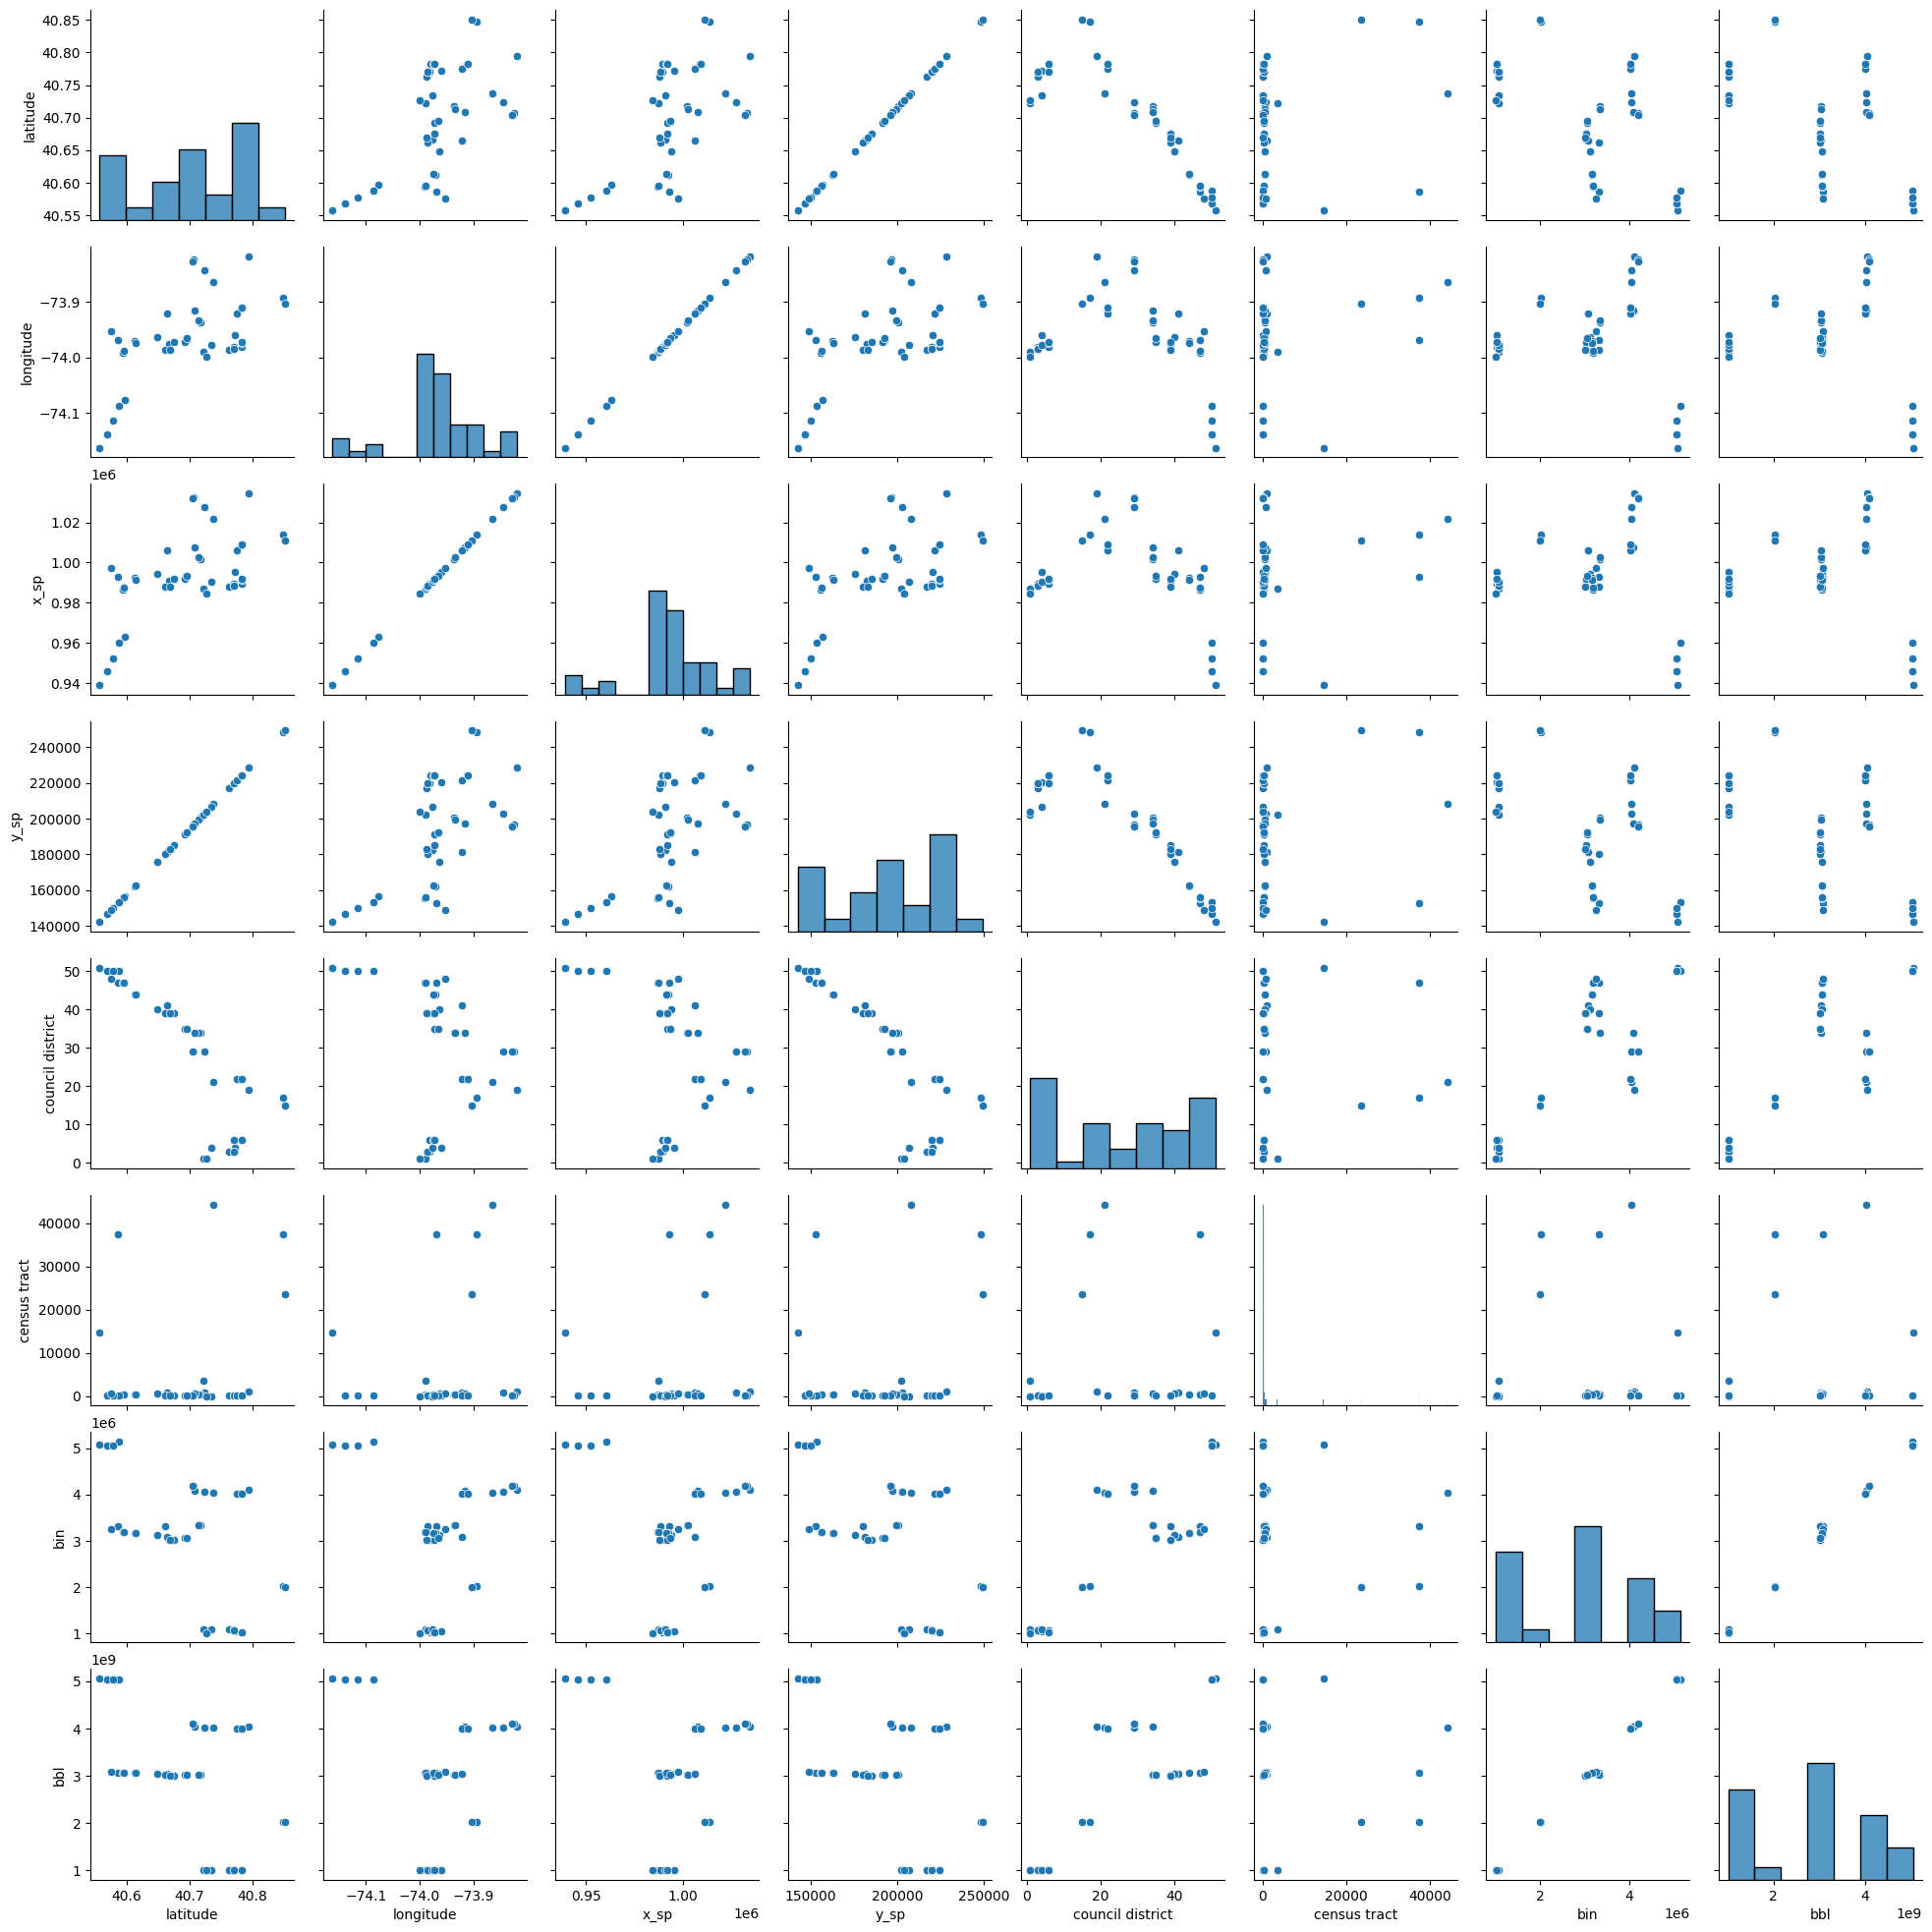

In [ ]:
# 3. To construct diagrams of the pairwise distribution of features.
import seaborn as sns

#sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
sns.pairplot(df[:50].select_dtypes(include=['float64']))
plt.show()


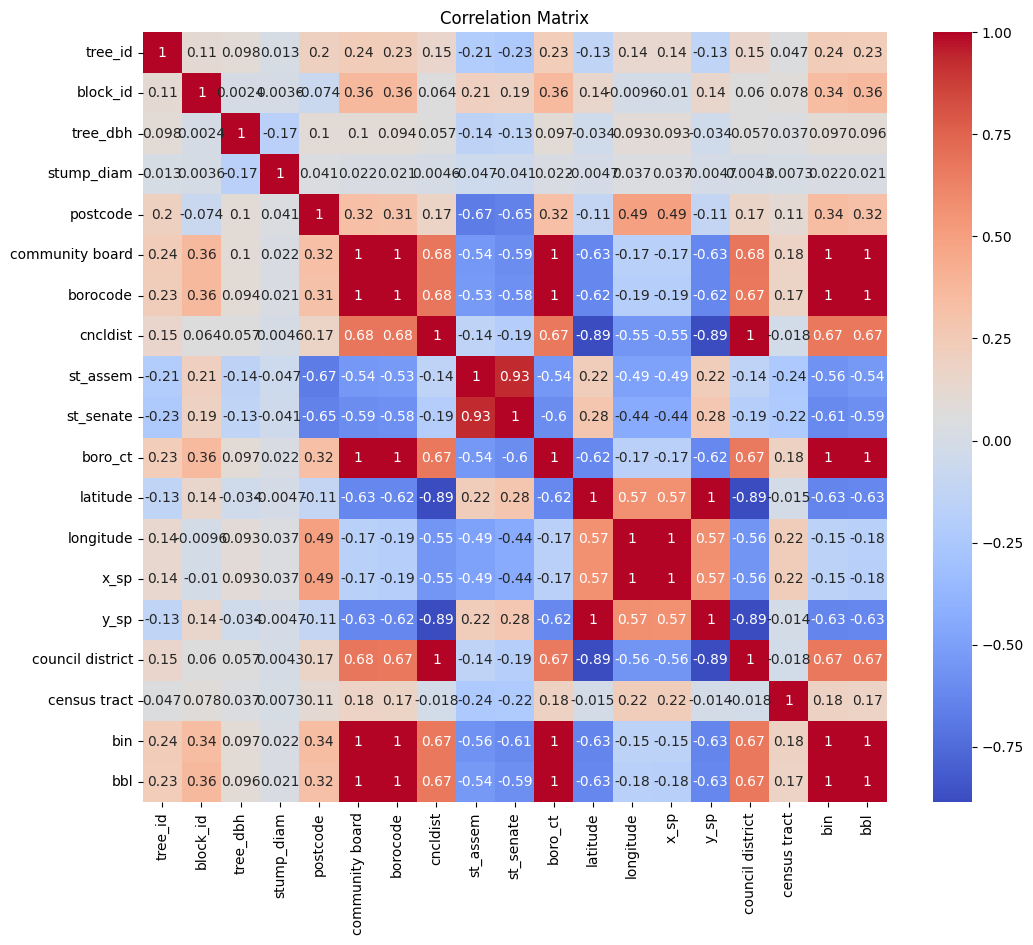

In [ ]:
# 4. Calculate and show a matrix of pairwise correlations between real features.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_df = df.select_dtypes(include=[np.number])


plt.figure(figsize=(12, 10))

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 5. Display the geographical representation of the trees from the dataset.
# The dataset has the following fields: latitude and longitude,
# and using libraries that allow you to display the position of objects on the map
# using latitude and longitude, you must provide a map of the location of trees
# from the data in the report.

import plotly.express as px

fig = px.scatter_geo(df[:5], lat='latitude', lon='longitude', hover_name='spc_common')
fig.update_layout(title='Geographical Distribution of Trees')
fig.show()


# Выводы по результатам

Данные о деревьях включают их породы, диаметр и восприятие состояния здоровья. Доступны сопроводительные данные blockface, указывающие на статус сбора и распространения данных по всему городу.
1. Отсуствуют данные  в большом количестве у :  steward, quards, problems.

2. Есть корреляция между:
  * cncldict и  coucil district
  * community board и borocode/boro_ct/bin/bbl
  * council district  и coucil district
  * bin и  community board/borocode/boro_ct/bin/bbl
  * bbl и  community board/borocode/boro_ct/bin/bbl
  * и т.д.
3. Все деревья в Нью-Йорке